In [8]:
#Importing the required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [9]:
#Importing the dataset

wine = pd.read_csv(r'C:\Users\Divyansh Mishra\Desktop\Code\Wine Classification\winequality-red.csv')
X = wine.iloc[:, 0:11].values
y = wine.iloc[: , 11:12].values

In [7]:
#A brief overview of the data:

wine.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


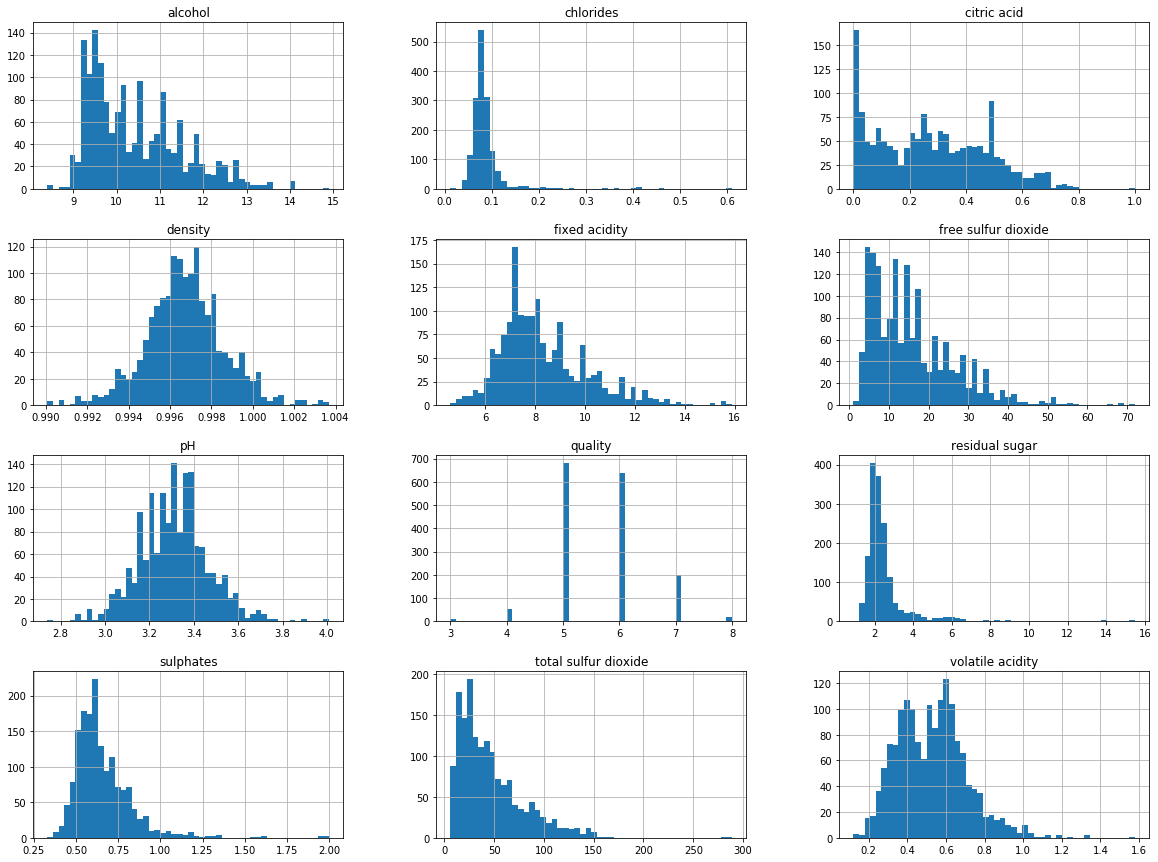

In [10]:
#Visual on dataset for a more clear approach

wine.hist(bins = 50, figsize = (20,15))
plt.show()


In [12]:
#Checking for null values if any
wine.isnull().sum()
#This confirms that null values are absent

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
#Before applying classification, we have a look at the important features from the dataset

corr_matrix = wine.corr()
corr_matrix['quality'].sort_values(ascending = False)

#Alcohol, sulphates, citric acid hold maximum importance with respect to wine quality

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D721103B48>,
      dtype=object)

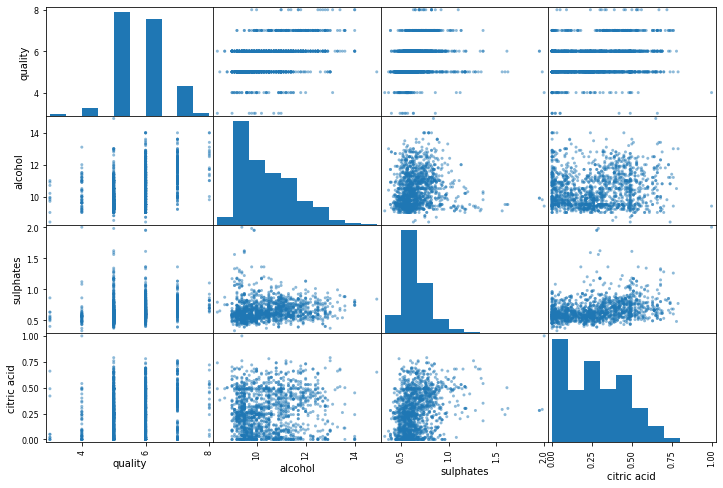

In [14]:
#Clubbing the stronger correlation sets together

from pandas.plotting import scatter_matrix
attributes = ["quality", "alcohol", "sulphates", "citric acid"]
scatter_matrix(wine[attributes], figsize = (12,8))


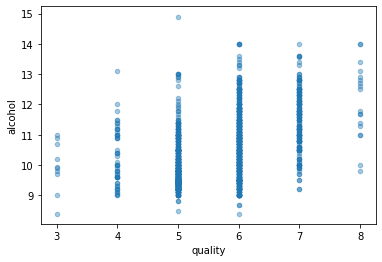

In [15]:
#Plotting the strongest correlation

wine.plot(kind = "scatter", x = 'quality', y = "alcohol", alpha = 0.4)

In [18]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
# Fitting the Random Forest Regression to the dataset

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
classifier = RandomForestClassifier(n_estimators = 200, random_state = 0)
classifier.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [20]:
#Predicting the results
y_pred = classifier.predict(X_test)
score = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test, average = 'weighted')

In [21]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)

In [22]:
cm1


array([[  0,   0,   0,   2,   0,   0],
       [  0,   0,   7,   4,   0,   0],
       [  0,   0, 109,  24,   2,   0],
       [  0,   0,  27, 106,   9,   0],
       [  0,   0,   1,   8,  16,   2],
       [  0,   0,   0,   1,   2,   0]], dtype=int64)

In [23]:
precision

0.7552852764736568

In [25]:
score


0.721875

In [26]:
#Using the KNN classification model

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
#Predicting the results

y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
score_knn = accuracy_score(y_pred, y_test)
precision_knn = precision_score(y_pred, y_test, average = 'weighted')


In [28]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [29]:
cm


array([[ 0,  0,  1,  1,  0,  0],
       [ 0,  0, 10,  1,  0,  0],
       [ 0,  0, 90, 43,  2,  0],
       [ 0,  2, 74, 55, 11,  0],
       [ 0,  1,  4, 13,  9,  0],
       [ 0,  0,  0,  1,  2,  0]], dtype=int64)

In [30]:
score_knn

0.48125

In [31]:
precision_knn

0.5359008215962441

The following results show that Random Forest gives the best classification on the given dataset and that the amount of alcohol in a particular wine is a strong factor for determining it's quality.